# Clustering techniques and Visualization

The goal of this notebook is to demonstrate how to analyze and visualize a dataset using clustering. 

In [3]:
from sklearn import datasets
data = datasets.load_iris()

In [13]:
# put everything into pandas dataframe
import pandas as pd
d_X = pd.DataFrame(data['data'],columns=data['feature_names'])
d_y = pd.DataFrame(data['target'])

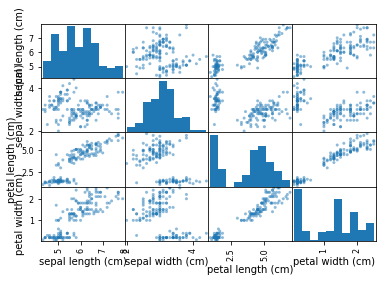

In [12]:
# plot scatter matrix to inspect correlation
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
scatter_matrix(d_X)
plt.show()

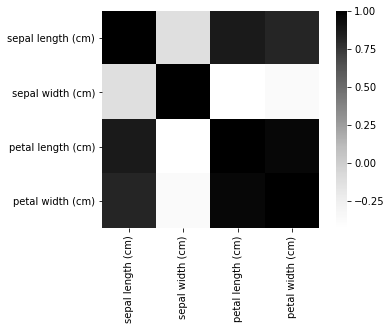

In [17]:
# Another way to visualize correlation. Some of the features are highly correlated
import seaborn as sns
corr_mat = d_X.corr()
sns.heatmap(corr_mat,vmax=1,square=True,cmap='Greys')
plt.show()

## The Elbow Method

This method allows finding the optimal number of clusters by looking at where the error not improve futher

In [120]:
# For some reasons, using the standard scaler reduces the metrics scores
from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(d_X)
X = np.array(d_X)
y = d_y

In [122]:
from sklearn.cluster import MiniBatchKMeans
# function to train model
def train_model(X,n_clusters=5):
    km = MiniBatchKMeans(n_clusters=n_clusters)
    km.fit(X)
    return km
# try different cluster number and then plot them
inertia = []
n_clusters = []
for i in range(1,30):
    model = train_model(X,i)
    inertia.append(model.inertia_)
    n_clusters.append(i)

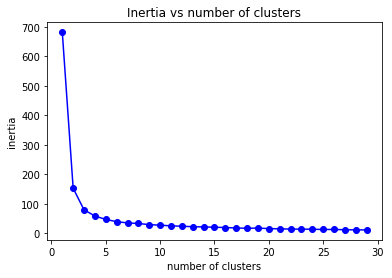

In [125]:
# plotting
plt.plot(n_clusters,inertia,'bo-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('Inertia vs number of clusters')
plt.show()

## Visualization using PCA



In [114]:
import numpy as np
n_clusters = 3

# training with 3 clusters
km = MiniBatchKMeans(n_clusters=n_clusters)
km.fit(X)
labels = km.labels_

# find the indexes of each class
indexes = []
for i in range(0,n_clusters):
    index = np.where(labels==i)
    indexes.append(index)

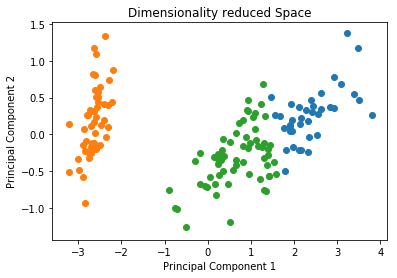

In [116]:
from sklearn.decomposition import PCA
# perform PCA for the dataset
pca = PCA(n_components=2)
components = pca.fit_transform(X)
p1,p2 = components[:,0],components[:,1]
# plot the scatter plot for each cluster
for i in range(0,n_clusters):
    plt.scatter(p1[indexes[i]],p2[indexes[i]])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dimensionality reduced Space')
plt.show()

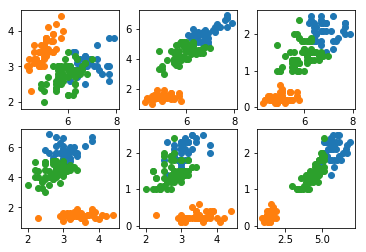

In [121]:
features = X.shape[1]

fig = plt.figure()

# getting the combinations of the features 
f_array = [i for i in range(0,4)]

ele = f_array.pop(0)
# combinations of x and y dimensions
plot_x = []
plot_y = []
# remove from f_array after pairing with all other features
while len(f_array) != 0:
    for f in f_array:
        plot_x.append(ele)
        plot_y.append(f)
    ele = f_array.pop(0)
# plot the combinations
for i in range(0,len(plot_x)):
    fig.add_subplot(2,len(plot_x)/2,i+1)
    j,k = plot_x[i],plot_y[i]
    for v in range(0,n_clusters):
        feature1,feature2 = X[:,j],X[:,k]
        index = np.where(labels==v)
        
        plt.scatter(feature1[index],feature2[index])
plt.show()

## Clustering Evaluation

### Definitions from sklearn:

Homogeneity: A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

Completeness_score: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

The V-measure is the harmonic mean between homogeneity and completeness:

    v = (1 + beta) * homogeneity * completeness
         / (beta * homogeneity + completeness)

In [115]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# homogeneity_score(y,pd.DataFrame(km.labels_))

print('Homogeneity Score: {}'.format(homogeneity_score(y[0],pd.DataFrame(km.labels_)[0])))
print('Completeness_score: {}'.format(completeness_score(y[0],pd.DataFrame(km.labels_)[0])))
print('v_measure_score: {}'.format(v_measure_score(y[0],pd.DataFrame(km.labels_)[0])))

Homogeneity Score: 0.7514854021988338
Completeness_score: 0.7649861514489815
v_measure_score: 0.7581756800057784


## References

1) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score

2) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score

3) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score

4) https://www.eduonix.com/learn-machine-learning-by-building-projects
    